In [1]:
!pip3 install pytorchts

     |████████████████████████████████| 87 kB 1.4 MB/s eta 0:00:011
     |████████████████████████████████| 2.1 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 165 kB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 1.4 MB/s  eta 0:00:01
     |████████████████████████████████| 5.4 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.1 MB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 2.7 MB/s eta 0:00:011
     |████████████████████████████████| 126 kB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 288 kB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 8.6 MB/s eta 0:00:01
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-non

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

from pts.model.deepar import DeepAREstimator
from pts import Trainer

/home/bsi/miniconda3/envs/ts/lib/python3.7/site-packages/gluonts/json.py:46: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [3]:
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

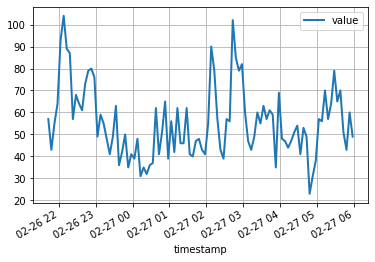

In [4]:
df[:100].plot(linewidth=2)
plt.grid(which='both')
plt.show()

In [5]:
training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"]}],
    freq = "5min"
)

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

estimator = DeepAREstimator(freq="5min",
                            prediction_length=12,
                            input_size=19,
                            trainer=Trainer(epochs=10,
                                            device=device))
predictor = estimator.train(training_data=training_data, num_workers=4)

/home/bsi/miniconda3/envs/ts/lib/python3.7/site-packages/gluonts/dataset/common.py:323: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
/home/bsi/miniconda3/envs/ts/lib/python3.7/site-packages/gluonts/dataset/common.py:323: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
/home/bsi/miniconda3/envs/ts/lib/python3.7/site-packages/gluonts/dataset/common.py:326: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/home/bsi/miniconda3/envs/ts/lib/python3.7/site-packages/gluonts/dataset/common.py:323: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
/home/bsi/miniconda3/envs/ts/lib/python3.7/site-packages/gluonts/dataset/commo

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

In [8]:

test_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-15 00:00:00"]}],
    freq = "5min"
)

/home/bsi/miniconda3/envs/ts/lib/python3.7/site-packages/gluonts/dataset/common.py:323: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
/home/bsi/miniconda3/envs/ts/lib/python3.7/site-packages/gluonts/dataset/common.py:326: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/home/bsi/miniconda3/envs/ts/lib/python3.7/site-packages/gluonts/dataset/common.py:328: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  timestamp.floor(timestamp.freq), timestamp.freq
/home/bsi/miniconda3/envs/ts/lib/python3.7/site-packages/gluonts/dataset/common.py:328: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/home/bsi/miniconda3/envs/ts/lib/python3.7/site-packages/gluonts/transform/split.py:36: F

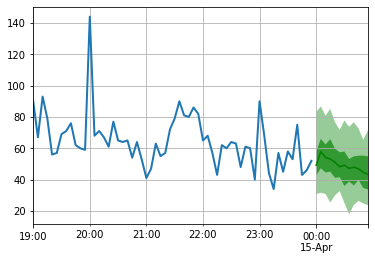

In [9]:
for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')